In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'Colab Notebooks'      'My Drive'	  Untitled1.ipynb
'Getting started.pdf'   Untitled0.ipynb  'Untitled document.gdoc'


In [ ]:
from tensorflow.keras.layers import Input, Flatten ,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks,optimizers
import numpy as np
import os
import tensorflow as tf


## ***IMAGE PREPROCESSING***

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.5,
        horizontal_flip=True,
        brightness_range=[1.0,2.0],
        )
train_set = train_datagen.flow_from_directory(
        r'/mydrive/Colab Notebooks/MD2/train',
        target_size=(224,224),
        color_mode='rgb',
        batch_size=64,
        shuffle=True,
        class_mode='categorical',
        seed=42,
        )

valid_datagen = ImageDataGenerator(rescale=1./255)
valid_set = valid_datagen.flow_from_directory(
        r'/mydrive/Colab Notebooks/MD2/validation',
        target_size=(224,224),
        color_mode='rgb',
        batch_size=64,
        class_mode='categorical',
        shuffle=True,
        seed=42,
        )


train_set.class_indices
train_set.classes

Found 8695 images belonging to 8 classes.
Found 1388 images belonging to 8 classes.


array([0, 0, 0, ..., 7, 7, 7], dtype=int32)

In [ ]:
train_set.class_indices

{'Bacterial Spot': 0,
 'Early Blight': 1,
 'Healthy': 2,
 'Late Blight': 3,
 'Leaf Mold': 4,
 'Septoria leaf spot': 5,
 'Target Spot': 6,
 'Tomato Mosaic Virus': 7}

In [ ]:
valid_set.class_indices

{'Bacterial Spot': 0,
 'Early Blight': 1,
 'Healthy': 2,
 'Late Blight': 3,
 'Leaf Mold': 4,
 'Septoria leaf spot': 5,
 'Target Spot': 6,
 'Tomato Mosaic Virus': 7}

# ***Create MODEL By Using Xception***

In [ ]:
from tensorflow.keras.applications import Xception

base_model = Xception(include_top = False, # Leave out the last fully connected layer
weights = 'imagenet',
input_shape = (224, 224, 3), 
pooling='max')



for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)

x = Dense(1024)(x)

x = Dense(512, activation='relu')(x)

x = Dense(8, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

83689472/83683744 [==============================] - 1s 0us/step


# ***COMPILE MODEL***

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', 
              optimizer=opt,
              metrics=['accuracy'])

# **Summary of MODEL**

In [ ]:
#summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [ ]:
elst=callbacks.EarlyStopping(monitor='val_loss',patience=5,mode='min')
save_ck=callbacks.ModelCheckpoint('.mdl_wt_system_3200.h5',save_best_only=True,monitor='val_loss',mode='min')

# ***FIT MODEL***

In [ ]:
r=model.fit(
                train_set,
                epochs=70,
                validation_data=valid_set
            )

Epoch 1/70
136/136 [==============================] - 4884s 36s/step - loss: 1.0741 - accuracy: 0.6281 - val_loss: 0.8555 - val_accuracy: 0.6931
Epoch 2/70
136/136 [==============================] - 176s 1s/step - loss: 0.7066 - accuracy: 0.7551 - val_loss: 0.6799 - val_accuracy: 0.7716
Epoch 3/70
136/136 [==============================] - 175s 1s/step - loss: 0.6220 - accuracy: 0.7842 - val_loss: 0.5882 - val_accuracy: 0.7889
Epoch 4/70
136/136 [==============================] - 174s 1s/step - loss: 0.5668 - accuracy: 0.8043 - val_loss: 0.6216 - val_accuracy: 0.7788
Epoch 5/70
136/136 [==============================] - 174s 1s/step - loss: 0.5205 - accuracy: 0.8186 - val_loss: 0.5398 - val_accuracy: 0.8127
Epoch 6/70
136/136 [==============================] - 175s 1s/step - loss: 0.4838 - accuracy: 0.8294 - val_loss: 0.5580 - val_accuracy: 0.8062
Epoch 7/70
136/136 [==============================] - 175s 1s/step - loss: 0.4728 - accuracy: 0.8354 - val_loss: 0.5024 - val_accuracy: 0.81

In [ ]:
model.save(r'/mydrive/Colab Notebooks/MD2/Plant_system_3200.model')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /mydrive/Colab Notebooks/MD2/Plant_system_3200.model/assets


# ***Plotting MODEL***

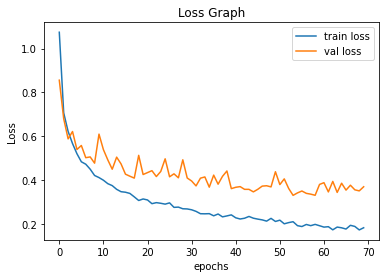

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

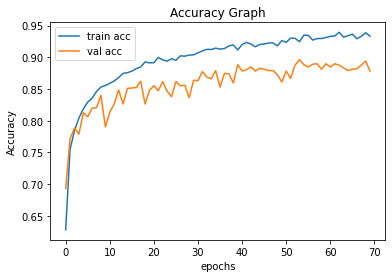

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
                                        r'/mydrive/Colab Notebooks/MD2/test',
                                        target_size=(224,224),
                                        color_mode='rgb',
                                        batch_size=64,
                                        class_mode='categorical',
                                        shuffle=False,
                                        seed=42)

test_imgs, test_labels = next(test_set)

Found 1359 images belonging to 8 classes.


# ***LOAD MODEL***

In [ ]:
model = tf.keras.models.load_model(r'/mydrive/Colab Notebooks/MD2/Plant_system_3200.model')
predictions = model.predict(x=test_set, verbose=0)
np.round(predictions)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# Confution Matrix

In [ ]:
import sklearn    
from sklearn.metrics import confusion_matrix

y_true=test_set.classes
y_pred=np.argmax(predictions, axis=-1)

cm = confusion_matrix(y_true, y_pred)

In [ ]:
cm

array([[140,   1,   0,   1,   1,   5,   2,   0],
       [ 11, 112,   0,  24,   3,   8,  16,   0],
       [  0,   5, 116,  18,   5,   0,  27,   2],
       [  1,   3,   0, 159,   2,   4,   3,   1],
       [  0,   2,   1,   3, 156,   3,   2,   5],
       [  3,  22,   1,  11,   9, 101,  14,  11],
       [  3,   6,   3,   2,   2,   5, 149,   3],
       [  1,   0,   0,   2,   3,   3,   0, 163]])

# ***CLASSIFICATION REPORT***

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       150
           1       0.74      0.64      0.69       174
           2       0.96      0.67      0.79       173
           3       0.72      0.92      0.81       173
           4       0.86      0.91      0.88       172
           5       0.78      0.59      0.67       172
           6       0.70      0.86      0.77       173
           7       0.88      0.95      0.91       172

    accuracy                           0.81      1359
   macro avg       0.82      0.81      0.80      1359
weighted avg       0.81      0.81      0.80      1359



In [ ]:
classes=['Bacterial Spot',
        'Early Blight',
        'Healthy',
        'Late Blight',
        'Leaf Mold',
        'Septoria leaf spot',
        'Target Spot',
        'Tomato Mosaic Virus']

#Prediction

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred [:10]

array([[9.83494341e-01, 6.05127634e-03, 1.20540335e-06, 4.18253214e-04,
        2.06107483e-03, 3.48934997e-03, 4.48435917e-03, 9.22760712e-09],
       [9.86715019e-01, 5.31212800e-06, 7.38540678e-08, 7.86623335e-04,
        1.28625552e-05, 1.24023370e-02, 7.00140881e-05, 7.77519654e-06],
       [9.90477920e-01, 1.69305531e-05, 2.08047197e-08, 3.24760826e-04,
        2.99447292e-05, 7.86612236e-06, 9.14261024e-03, 1.81628698e-10],
       [9.99889970e-01, 2.47486173e-06, 9.69775328e-07, 8.83348079e-08,
        4.53536768e-06, 1.05694298e-05, 9.13649128e-05, 1.59225111e-09],
       [9.02650118e-01, 1.54826313e-03, 4.31786107e-10, 3.68044493e-05,
        6.86417043e-05, 9.27084759e-02, 2.98190839e-03, 5.91563457e-06],
       [9.99979734e-01, 9.27367296e-07, 1.28088207e-09, 1.16358407e-08,
        1.41787427e-06, 1.99790122e-08, 1.78895862e-05, 2.42498324e-08],
       [8.03794920e-01, 9.96452719e-02, 1.10232158e-07, 3.84213217e-06,
        3.90372361e-06, 9.65136364e-02, 2.32177408e-05, 1.

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]

In [ ]:
y_classes[:15]

[0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 3, 0]

In [ ]:
classes[y_classes[13]]

'Late Blight'

In [ ]:
classes[y_classes[8]]

'Septoria leaf spot'

In [ ]:
classes[y_classes[1]]

'Bacterial Spot'

# ***USER INTERFACE***

In [ ]:
!pip install --quiet gradio
import gradio as gr

     |████████████████████████████████| 1.6MB 25.1MB/s 
     |████████████████████████████████| 1.9MB 58.3MB/s 
     |████████████████████████████████| 215kB 52.0MB/s 
     |████████████████████████████████| 3.2MB 40.2MB/s 
     |████████████████████████████████| 71kB 10.5MB/s 
     |████████████████████████████████| 962kB 49.3MB/s 


In [ ]:
def classify_image(inp):
  
    inp = inp.reshape(-1, 224, 224,3).astype('float32')
    inp = np.array(inp)/255
  
    predictions = model.predict(x=inp, verbose=0)
    np.round(predictions)
    pred=np.argmax(predictions, axis=-1)[0]
    density = classes[pred]
    return density

image = gr.inputs.Image(shape=(224, 224))
label = gr.outputs.Label(num_top_classes=3)

gr.Interface(
    classify_image, 
    image, 
    label,
    capture_session=True, interpretation="default").launch();

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://33968.gradio.app
Interface loading below...
